# Proyecto 1
## Data Science with Python
### **Andrés Alberto Peña Maltez**
###  Febrero 2023

#### Importando Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set()

#### Lectura de Datos

In [2]:
# Leyendo la data del archivo dado para el proyecto
training_data = np.load('Proyecto1_training_data.npy')
training_data = pd.DataFrame(training_data)

##Colocando nombre correcto a las columnas
training_data.set_axis(['Price', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis='columns', inplace=True)
training_data
len(training_data)
##export_word_count = training_data.to_excel (r'D:\Data Science\Maestria UG\Año 1\Pyton\Proyecto 1\Data.xlsx', index = None, header=True)



C:\Users\tecan\AppData\Local\Temp\ipykernel_55316\1771725375.py:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  training_data.set_axis(['Price', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis='columns', inplace=True)


1460

##### Estadística descriptiva de datos crudos

In [3]:
##Estadisticas Básicas
training_data.describe()

,Price,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


####  Interpolando los datos para los elementos cacios

In [4]:
##Se llenan datos Nulos,  por medio del proceso de interpolación 
training_data_interpolate = training_data.interpolate()
##training_data_final = training_data.interpolate()
##test_data_final = training_data.interpolate()
##export_word_count = training_data1.to_excel ('D:\Data Science\Maestria UG\Año 1\Pyton\Proyecto 1\Data1.xlsx', index = None, header=True)



### Paso 2:  Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validación


In [5]:
## Sacando el número de elementos
len(training_data_interpolate)

## Haciendo el Slicing del 80% y 20% de los datos
training_data_final = training_data_interpolate[:1168]
test_data_final = training_data_interpolate[1168:1461]


 ### Paso 3:  Análisis exploratorio de datos

In [6]:
training_data_final.describe()

,Price,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.996147
std,78815.697902,1.378025,373.780374,1.609141,29.951707,22.251864
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,60.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,69.500000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [7]:
test_data_final.describe()

,Price,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,182244.869863,6.092466,1187.839041,6.647260,1970.534247,71.042808
std,82026.898202,1.405076,433.843272,1.685462,31.229373,26.028493
min,52500.000000,3.000000,483.000000,3.000000,1872.000000,21.000000
25%,130000.000000,5.000000,881.250000,6.000000,1950.000000,60.000000
50%,163500.000000,6.000000,1106.000000,6.000000,1971.500000,68.000000
75%,214250.000000,7.000000,1407.750000,8.000000,2001.000000,80.541667
max,745000.000000,10.000000,4692.000000,12.000000,2009.000000,313.000000


### Paso 4:  Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

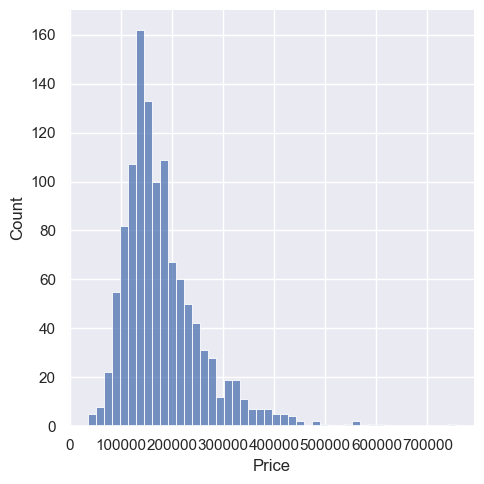

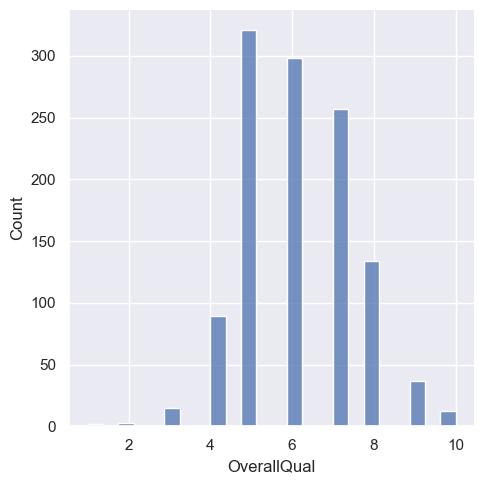

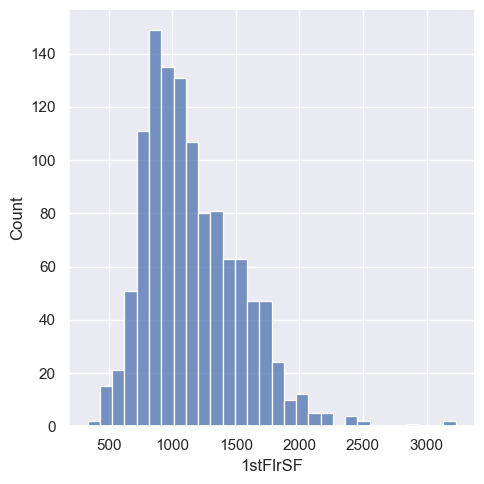

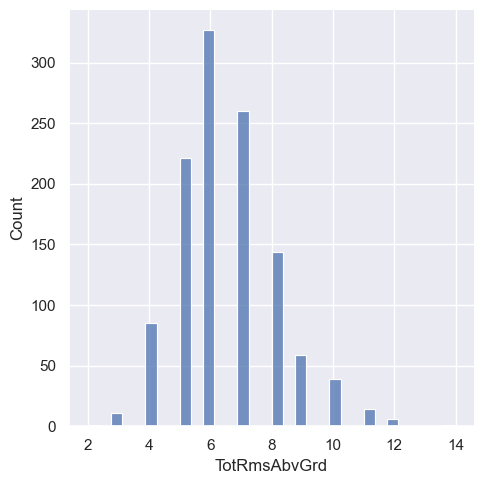

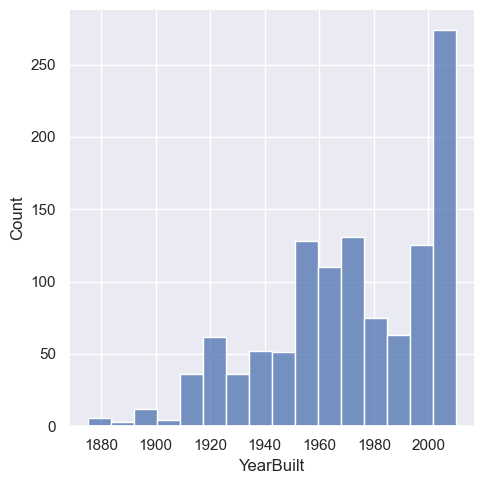

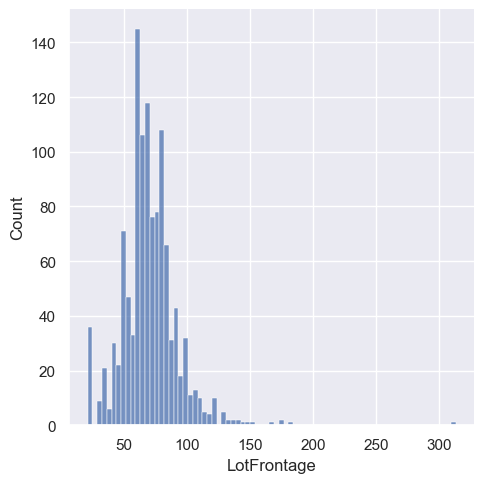

In [8]:
for column in training_data_final.columns:
    sns.displot(training_data_final[column])

    
 

### Paso 5:  Para cada variable independiente x :

Calcular el coeficiente de correlacion entre x y y.

Graficar x vs y(scatterplot) usando matplotlib.

Colocar el coeficiente de correlacion y colocarlo como parte del tıtulo de la grafica.

Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion entre dicha variable y la variable dependiente.

In [9]:
##  Calculo de los coeficientes de Correlación
##  En este caso Y  es Price, usaremos solo la primer columna
text= "Corr"
corr = training_data_final.corr()
corr.iloc[0,:]


Price           1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.321893
Name: Price, dtype: float64

Text(0.5, 1.0, 'Corr 0.322')

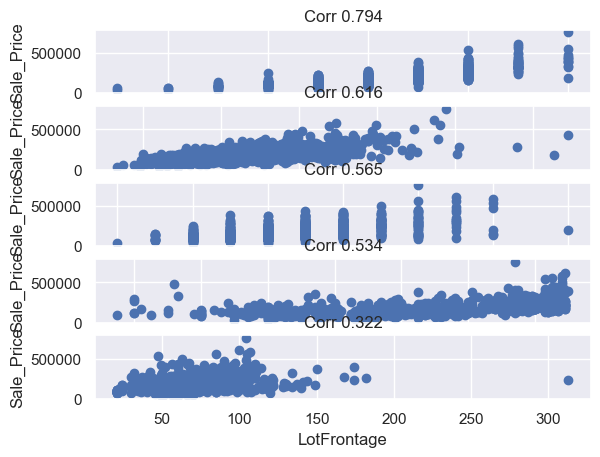

In [293]:



plt.subplot(5, 1, 1)
plt.scatter(training_data_final.iloc[:,1], training_data_final.iloc[:,0])
plt.xlabel("OverallQual")
plt.ylabel("Sale_Price")
plt.title(f"{text} {np.round(corr.iloc[0,1],3)}")
plt.subplot(5, 1,2)
plt.scatter(training_data_final.iloc[:,2], training_data_final.iloc[:,0])
plt.xlabel("1stFlrSF")
plt.ylabel("Sale_Price")
plt.title(f"{text} {np.round(corr.iloc[0,2],3)}")
plt.subplot(5, 1,3)
plt.scatter(training_data_final.iloc[:,3], training_data_final.iloc[:,0])
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("Sale_Price")
plt.title(f"{text} {np.round(corr.iloc[0,3],3)}")
plt.subplot(5, 1,4)
plt.scatter(training_data_final.iloc[:,4], training_data_final.iloc[:,0])
plt.xlabel("YearBuilt")
plt.ylabel("Sale_Price")
plt.title(f"{text} {np.round(corr.iloc[0,4],3)}")
plt.subplot(5, 1,5)
plt.scatter(training_data_final.iloc[:,5], training_data_final.iloc[:,0])
plt.xlabel("LotFrontage")
plt.ylabel("Sale_Price")
plt.title(f"{text} {np.round(corr.iloc[0,5],3)}")


### Paso 6:  Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0+β1 ∗x
### La funcion recibe como argumentos:
 

6.1 Vector con la variable independiente x,

6.2 Vector con la variable dependiente y,

6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.

6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremosimprimir a traves de print: el numero de iteracion, el error del modelo en esa iteracion, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.

6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar en cada iteracion los parametros del modelo.


In [463]:
epochs = 100
imprimir_error = 0
alpha = 0.01

y0 = training_data_final.iloc[:,0]
x1 = training_data_final.iloc[:,1]
x2 = training_data_final.iloc[:,2] 

xt_1 = test_data_final.iloc[:,1]
xt_2 = test_data_final.iloc[:,2]
xt_3 = test_data_final.iloc[:,3]
xt_4 = test_data_final.iloc[:,4]
xt_5 = test_data_final.iloc[:,5]
yt_0 = test_data_final.iloc[:,0]




### Numeral 7:

#### Para crear su funcion debe considerar lo siguiente:

Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x y la segunda columna de la matriz para todas las filas es igual a 1.

Inicializar los parametros del modelo en un vector β0 y β1, esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteracion actualizaremos hasta encontrar una que aproxime de buena manera los datos x, y.

por cada epoch (iteracion) debe:

Calcular yp (prediccion o estimacion) para todas las observaciones de manera simultanea (vectorizada) utilizando el modelo correspondiente a la iteracion (es decir ,los valores de β0 y β1,): esto produce un vector yp con el mismo numero de elementos que y.

Conceptualmente el calcular vectorizadamente la prediccion para una unica observacion del datdataset, significarıa aplicar el modelo lineal a esta observacion por ejemplo, si x = 2, y los par´ametros son β1 = 0,1 , β0 = 0,2 tendrıamos:

yp = 0,1(2) + 0,2

Tomando en cuenta que agregamos una columna adicional con el valor 1, podemos
usar el producto punto para realizar este mismo calculo , por ejemplo(lo siguiente no es codigo real solo ejemplo ): 
observacion = [2,1], parametros = [0.1,0.2]
yp = np.dot(observacion, parametro)
Esto es igual que : 2(0.1) + 1(0.2) = 2(0.1) + 0.2
Por lo tanto para calcular la aproximacion yp de manera simultanea a todas las observaciones debemos aplicar una multiplicacion matricial(matriz ,vector)

Calcular el error o costo usando: y ,yp

error = (1/2n)*(Sumatoria de i=0 a n de (y-yp)^2)

Esto produce un escalar que indica el error (mientras mas alto peor el modelo,
mientras mas bajo mejor el modelo) producido por el modelo correspondiente
a la iteracion(es decir, el error para ciertos parametros β0, β1)

Almacenar en un vector el error de cada iteracion.

Calcular el gradiente del error respecto de cada par´ametro con las expresiones:
 
δe/δβ1 = 1/n* (sumatoria de 0 a n de ((yp-y)*x))

δe/δβ0 = 1/n* (sumatoria de 0 a n de ((yp-y)*1))
 
 
Actualizar los parametros del modelo con la expresion:

β1 superindice i+1 = β1 superindice i - alpha*(δe/δβ1)

β0 superindice i+1 = β0 superindice i - alpha*(δe/δβ0)

Donde: β0 y β1: son los par´ametros del modelo δe/δβ1, δe/δβ0 del resultado del paso anterior y α es el par´ametro ? enviado a la funcion, un valor muy grande de este puede hacer que nunca se logre la convergencia a un modelo adecuado y un valor muy peque˜no puede hacer que se necesiten demasiadas iteraciones(y mucho tiempo) para obtener el modelo optimo. Nuevamente esto es conceptualmente el calculo a realizar, al traducirlo a programacion debemos hacerlo vectorizadamente utilizando el vector de parametros(con los valores de la iteracion anterior) y el vector gradiente calculado en el paso anterior.

Almacenar en una estructura de datos el modelo resultante(a discreci´on del estudiante, por ejemplo un diccionario donde la llave es el numero de iteracion y el valor es un vector con los parametros).

La funcion devuelve 2 resultados: La estructura de datos conteniendo el modelo de cada iteracion y el error de cada iteracion.

Crear una funcion que nos permita visualizar con matplotlib como cambia el error en el tiempo: crear una funcion que tome como parametro el vector de errores generados por la funcion de entrenamiento y grafique en el eje x el numero de iteracion y en el eje y el error para esa iteracion.

Crear una funcion que nos permita visualizar con matplotlib como evoluciona el
modelo entrenado en el tiempo : Crear una funcion que tome como parametro la
estructura de datos conteniendo el historial de modelos ,y un valor "n" que indica cada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la funcion debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

Utilizar las funciones del punto anterior para entrenar modelos de regresion lineal y = β0+β1 ∗x , para cada una de las variables x elegidas, basandose en las funciones para graficar las curvas de aprendizaje y comparacion del modelo vs los datos elegir el numero de epochs o iteraciones a entrenar el modelo(y experimentar con el α)

Criterio: El error debe disminuir lo mas posible por lo cual la curva de aprendizaje debe disminuir hasta que ya no disminuya mucho (se estabilice o converja ) , si el error baja y comienza a subir debemos usar menos iteraciones.


In [448]:
def linear_regression(x, y, alpha, epochs):
    """
    Implementa la regresión lineal para ajustar una recta a los datos x,y
    
    Argumentos:
    x -- vector numpy con los datos x
    y -- vector numpy con los datos y
    alpha -- tasa de aprendizaje
    epochs -- número de iteraciones para actualizar los parámetros
    
    Retorna:
    modelo -- diccionario con los parámetros beta0 y beta1 para cada epoch
    errores -- vector numpy con el error de cada epoch
    """
    
    # Paso 1: crear matriz con datos x y una columna de 1's
    X = np.column_stack((x, np.ones_like(x)))
    
    # Paso 2: inicializar parámetros del modelo
    beta = np.zeros((2, 1))  # Vector columna con dos filas: beta1 y beta0

    # Paso 3: actualizar parámetros para cada epoch
    modelo = {}
    errores = []
    for i in range(epochs):
        
        # Paso 3.1: calcular la predicción usando los parámetros actuales
        yp = np.dot(X, beta)
        
        # Paso 3.2: calcular el error y agregarlo al vector de errores
        error = np.sum((yp - y)**2) / (2 * len(y))
        ##error = np.mean((yp - y) ** 2)/ (2)
        errores.append(error)
        
        # Paso 3.3: calcular el gradiente del error respecto a beta1 y beta0
        gradiente = np.dot(X.T, yp - y) / len(y)
        
        # Paso 3.4: actualizar los parámetros del modelo
        beta = beta - alpha * gradiente
        
        # Paso 3.5: almacenar los parámetros del modelo en una estructura de datos
        modelo[i] = beta.squeeze()
    
    return beta, modelo, gradiente, errores, yp
    


def graficar_prediccion(yp):
    plt.plot(range(len(yp)), yp)
    plt.xlabel('cuenta')
    plt.ylabel('estimacion precio')
    plt.title('Evolución del error durante el entrenamiento')
    plt.show()

def graficar_error(errores):
    plt.plot(range(len(errores)), errores)
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.title('Evolución del error durante el entrenamiento')
    plt.show()

def graficar_modelos(x, y, modelos, n):
    for i in range(1, len(modelos)+1, n):
        beta = modelos[i]
        yp = beta[0]*x + beta[1]
        plt.plot(x, yp, label=f'Iteración {i}')
    plt.scatter(x, y, label='Datos')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Evolución del modelo durante el entrenamiento')
    plt.show()
    
    
    


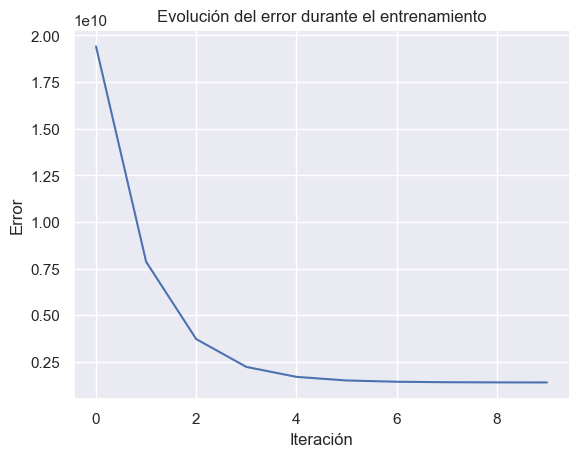

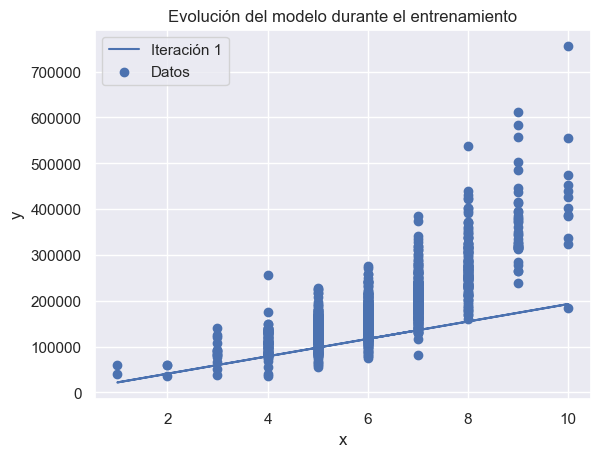

In [513]:

# Data set de entrenamiento
x = np.array(x1).reshape(-1, 1)
y = np.array(y0).reshape(-1, 1)
xt = np.array(xt_1).reshape(-1, 1)

# Llamada a la función de regresión lineal
betias, modelo, gradi, errores, yp = linear_regression(x, y, alpha=0.01, epochs= 10)

graficar_error(errores)
graficar_modelos(x, y, modelo, 11)

### Usando las Betas encontradas para construir la recta y las predicciones desde el modelo lineal.





In [507]:
# Llamada a la función de regresión lineal
#betias_prueba, modelo, gradi, errores, yp = linear_regression(x, y, alpha, epochs)
betias, modelo, gradi, errores, yp = linear_regression(x, y, alpha=0.01, epochs= 100)

def Modelo_manual (x_prueba):
        
    # Data set de entrenamiento
    x = np.array(x1).reshape(-1, 1)
    y = np.array(y0).reshape(-1, 1)
    y_pred_man = (betias[0]*x_prueba)+betias[1]
   
    return y_pred_man


## Creando el modelo con Scikit-lear


Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo
de regresi´on lineal: https://scikit-learn.org/stable/modules/generated/
sklearn.linear_model.LinearRegression.html

In [508]:
from sklearn.linear_model import LinearRegression
def sk_regresion_lineal(x, y):
    # Crea un modelo de regresión lineal
    modelo = LinearRegression()
    # Entrena el modelo con las variables x y la variable y
    modelo.fit(x, y)
    # Devuelve el modelo entrenado
    return modelo


##  Datos a enviar a modelo
x = np.array(x1).reshape(-1, 1)
y = np.array(y0).reshape(-1, 1)
xt_a = np.array(xt_1).reshape(-1, 1)
xt_b = np.array(xt_2).reshape(-1, 1)
xt_c = np.array(xt_3).reshape(-1, 1)
xt_d = np.array(xt_4).reshape(-1, 1)
xt_e = np.array(xt_5).reshape(-1, 1)
yt = np.array(yt_0).reshape(-1, 1)

# Entrena el modelo de regresión lineal
modelo = sk_regresion_lineal(x, y)

# Realiza una predicción
prediction = modelo.predict(xt)


### Definiendo función combinada de predicciones

Para cada variable independiente x elegida, crear una funcion que usando el modelo entrenado manualmente y el modelo de scikit-learn (enviados como parametros a la funcion) calcule la estimacion o prediccion de cada uno de estos y devuelva como resultado una prediccion estimada promediando las predicciones de los 2 modelos, la funcion debe recibir como parametro adicional un vector de cualquier tamaño de x y devolver 3 vectores cada uno del mismo tama˜no del vector x, estos vectores son:
◦ La prediccion con el modelo entrenado manualmente
◦ La prediccion con el modelo de scikit-learn
◦ La combinacion(promedio) de las 2 anteriores.

In [509]:
def modelos (x_prueba):
    # Obtener la predicción del modelo de Scikit-learn
    prediccion_manual = Modelo_manual (x_prueba)

     # Obtener la predicción del modelo de Scikit-learn
    prediccion_SK = modelo.predict(x_prueba)

    # Calcular la combinación promedio de las dos predicciones
    prediccion_CB = [(prediccion_manual[i] + prediccion_SK[i])/2 for i in range(len(x_prueba))]
    prediccion_CB_Final = np.array(prediccion_CB).reshape(-1, 1)
    
    return prediccion_manual, prediccion_SK, prediccion_CB_Final


###  Ejecutando la función de los tres modelos para obtener las predicciones

In [510]:
##  Datos a enviar a modelo
x = np.array(x1).reshape(-1, 1)
y = np.array(y0).reshape(-1, 1)
xt_a = np.array(xt_1).reshape(-1, 1)
xt_b = np.array(xt_2).reshape(-1, 1)
xt_c = np.array(xt_3).reshape(-1, 1)
xt_d = np.array(xt_4).reshape(-1, 1)
xt_e = np.array(xt_5).reshape(-1, 1)
yt = np.array(yt_0).reshape(-1, 1)

manual, SK, CB = modelos (xt_a)


###  Prueba de Set de datos de Prueba
Usando el 20% de los datos de validaci´on, aplicamos los modelos predictivos para
estimar la variable dependiente y usando los valores reales de y calculamos el error
de cada modelo. Para cada variable independiente x elegida:
◦ Graficar el error de cada modelo para esta variable ?x?
◦ Concluir cu´al modelo para la variable x es el mejor a ser usado (error mas bajo)

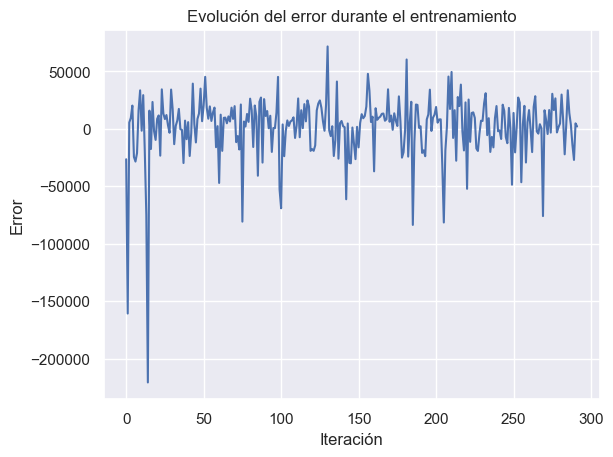

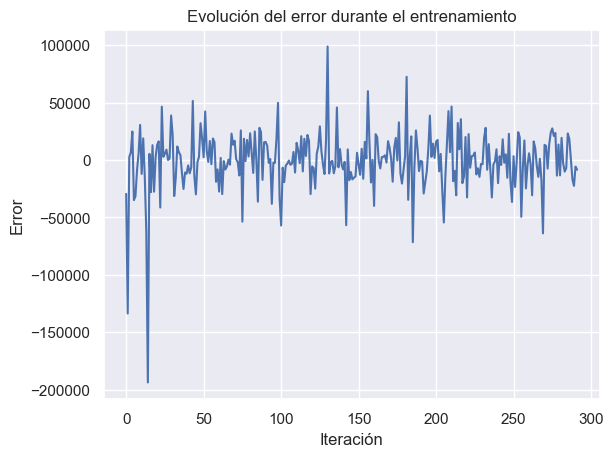

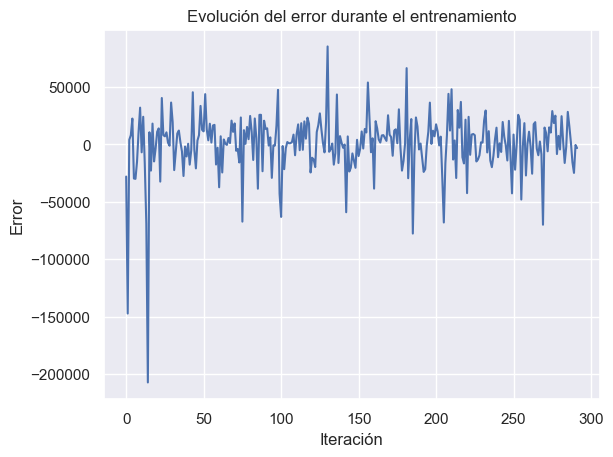

(22096414416.151066, 21792739642.88879, 21929951988.286697)

In [511]:
manual_X1, SK_X1, CB_X1 = modelos (xt_a)
manual_X2, SK_X2, CB_X2 = modelos (xt_b)
manual_X3, SK_X3, CB_X3 = modelos (xt_c)
manual_X4, SK_X4, CB_X4 = modelos (xt_d)
manual_X5, SK_X5, CB_X5 = modelos (xt_e)

error_Manual_X1 = np.array([(manual_X1[i] - yt[i])/2 for i in range(len(xt_a))]).reshape(-1, 1)
error_SK_X1 =  np.array([(SK_X1[i] - yt[i])/2 for i in range(len(xt_a))]).reshape(-1, 1)
error_CB_X1 =  np.array([(CB_X1[i] - yt[i])/2 for i in range(len(xt_a))]).reshape(-1, 1)

error_Manual_X1, "   ", error_SK_X1

graficar_error(error_Manual_X1)
graficar_error(error_SK_X1)
graficar_error(error_CB_X1)

errorsito1 = np.sum((error_Manual_X1 - yt)**2)/(2*len(yt))
errorsito2 = np.sum((error_SK_X1 - yt)**2)/(2*len(yt))
errorsito3 = np.sum((error_CB_X1 - yt)**2)/(2*len(yt))

errorsito1, errorsito2, errorsito3

###  CONCLUSIÓN:
####  Se observa en conclusión que la predicción de Sklearn tiene un 1.3518% menos error que el modelo entrenado manualmente, 
####  y tiene un 0.6086% menos error que el promedio de los dos modelos,
####  por lo tanto el mejor modelo para la predicción de los datos resulta ser el usado con la función LinearRegression() de
####  SKLearn

## Creando las clases:

Todo este desarrollo debe hacerse por medio de programacion orientada a objetos, es
decir que debera crear una clase que realice todo lo mencionado y posea los campos y
metodos necesarios para que funcione correctamente.

##### Realmente se trabajo en cada uno de los incisos, pero realmente me hizo falta enfocar todo el proyecto desde el inicio 
##### a las clases, el tiempo a pesar que fue suficiente desde que se dejó el proyecto, lo invertí casi en su totalidad en investigar
##### y tratar de ir completando cada uno de los puntos, al final, quizá no se hizo orientado a objetos, usando las clases, pero traté
##### de hacer mi mejor esfuerzo y este es mi proyecto.